# This is the Juypter Notebook containing simulations for Theorem 7 in the paper "Networked Competitive Bivirus SIS Model - Analysis of the Discrete-Time Case"

In [12]:
import bivirus
import numpy as np
import importlib
importlib.reload(bivirus)

<module 'bivirus' from '/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py'>

In [13]:
def path_graph_adjacency(n, W = 1):
    A = np.zeros((n, n))
    for i in range(n - 1):
        A[i, i + 1] = np.random.uniform(0, W)
        A[i + 1, i] = np.random.uniform(0, W)
    return A

# 1. Run single-virus epidemics for virus 1

In [14]:
# configurations of the experiment
config = bivirus.SimulationConfig(N=20, h=0.001, threshold=1.5, W=2, iterations=10000, tolerance=1e-6)

# random seed for reproducibility
seed = 1049
np.random.seed(seed)

# parameters of the model
A1_raw = np.random.uniform(0, config.W, (config.N, config.N))
# Set all values in A below 'threshold' to zero
A1_thres = np.where(A1_raw < config.threshold, 0, A1_raw)

# add the path graph adjacency matrix to ensure strong connectivity
A1 = A1_thres + path_graph_adjacency(config.N, W=config.W/10)
beta = [
    0.25 * np.ones(config.N),
    np.ones(config.N)
]
B1 = np.diag(beta[0]) @ A1

delta = [
    np.ones(config.N),
    np.ones(config.N)
]
print("B1 is:", B1)

B1 is: [[0.3751274  0.46138459 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.39052873
  0.41890661 0.        ]
 [0.03200272 0.44817474 0.00884001 0.         0.47459876 0.43843119
  0.         0.         0.40410746 0.49736991 0.         0.
  0.         0.         0.         0.47822679 0.         0.45728766
  0.         0.        ]
 [0.         0.01750619 0.         0.46785249 0.         0.
  0.         0.46331034 0.         0.         0.         0.
  0.         0.40761723 0.38143843 0.38192828 0.         0.
  0.37745677 0.        ]
 [0.         0.43347433 0.45218733 0.         0.02421239 0.42436723
  0.         0.         0.47381428 0.         0.         0.
  0.41180189 0.         0.49832461 0.         0.         0.
  0.         0.38002525]
 [0.         0.         0.         0.03850664 0.         0.46901635
  0.         0.         0.47077985 0.47831887 0.40088728 0.
  0.         

/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8154/1705902124.py:19: RuntimeWarning: divide by zero encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8154/1705902124.py:19: RuntimeWarning: overflow encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8154/1705902124.py:19: RuntimeWarning: invalid value encountered in matmul
  B1 = np.diag(beta[0]) @ A1


In [15]:
# calculate the single virus equilibrium for virus 1
z = bivirus.x_bar(0.1 * np.ones(config.N), B1, delta[0], config)
print("z: ", z.round(2))

x_bar Converged at iteration 8767
z:  [0.47 0.65 0.56 0.61 0.57 0.46 0.47 0.55 0.46 0.65 0.4  0.32 0.38 0.41
 0.49 0.55 0.49 0.61 0.43 0.48]


/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:68: RuntimeWarning: divide by zero encountered in matmul
  # x = np.clip(x, 0, 1)  # Ensure infection levels are between 0 and 1
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:68: RuntimeWarning: overflow encountered in matmul
  # x = np.clip(x, 0, 1)  # Ensure infection levels are between 0 and 1
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:68: RuntimeWarning: invalid value encountered in matmul
  # x = np.clip(x, 0, 1)  # Ensure infection levels are between 0 and 1


# 2. Find an irreducible matrix $C$ such that $Cz=z$, $C$ is irreducible, and $C$ has spectral radius 1

Notice that none of the components of $z$ can be zero such a $C$ to exist, due to the Perron-Frobenius Theorem

In [16]:
C = bivirus.find_C(z)
# verifying the properties of C
bivirus.verify_C(z, C)

C @ z is: [0.47125379 0.64636791 0.56083302 0.60726077 0.56865185 0.45736644
 0.46500604 0.54730808 0.45784852 0.64765229 0.39563445 0.32263491
 0.38424521 0.41178374 0.49440242 0.55053808 0.48650408 0.60702379
 0.42853673 0.48287183]
z is: [0.47125379 0.64636791 0.56083302 0.60726077 0.56865185 0.45736644
 0.46500604 0.54730808 0.45784852 0.64765229 0.39563445 0.32263491
 0.38424521 0.41178374 0.49440242 0.55053808 0.48650408 0.60702379
 0.42853673 0.48287183]
C has spectral radius: 0.9999999999999997
C satisfies the assumptions of Theorem 7


In [17]:
A2 = np.linalg.inv(np.eye(config.N) - np.diag(z)) @ C
B2 = np.diag(beta[1]) @ A2
B = [B1, B2]
print(B2)

[[0.08918262 0.08918262 0.08918262 0.08918262 0.08918262 0.08918262
  0.08918262 0.08918262 0.08918262 0.08918262 0.08918262 0.08918262
  0.08918262 0.08918262 0.08918262 0.08918262 0.08918262 0.08918262
  0.08918262 0.08918262]
 [0.18289455 0.18289455 0.18289455 0.18289455 0.18289455 0.18289455
  0.18289455 0.18289455 0.18289455 0.18289455 0.18289455 0.18289455
  0.18289455 0.18289455 0.18289455 0.18289455 0.18289455 0.18289455
  0.18289455 0.18289455]
 [0.12778402 0.12778402 0.12778402 0.12778402 0.12778402 0.12778402
  0.12778402 0.12778402 0.12778402 0.12778402 0.12778402 0.12778402
  0.12778402 0.12778402 0.12778402 0.12778402 0.12778402 0.12778402
  0.12778402 0.12778402]
 [0.15471898 0.15471898 0.15471898 0.15471898 0.15471898 0.15471898
  0.15471898 0.15471898 0.15471898 0.15471898 0.15471898 0.15471898
  0.15471898 0.15471898 0.15471898 0.15471898 0.15471898 0.15471898
  0.15471898 0.15471898]
 [0.13191408 0.13191408 0.13191408 0.13191408 0.13191408 0.13191408
  0.13191408 0.1

/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8154/1324593732.py:1: RuntimeWarning: divide by zero encountered in matmul
  A2 = np.linalg.inv(np.eye(config.N) - np.diag(z)) @ C
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8154/1324593732.py:1: RuntimeWarning: overflow encountered in matmul
  A2 = np.linalg.inv(np.eye(config.N) - np.diag(z)) @ C
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8154/1324593732.py:1: RuntimeWarning: invalid value encountered in matmul
  A2 = np.linalg.inv(np.eye(config.N) - np.diag(z)) @ C
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8154/1324593732.py:2: RuntimeWarning: divide by zero encountered in matmul
  B2 = np.diag(beta[1]) @ A2
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8154/1324593732.py:2: RuntimeWarning: overflow encountered in matmul
  B2 = np.diag(beta[1]) @ A2
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8154/1324593732.py:2: RuntimeWarning: invalid value encoun

All assumptions satisfied


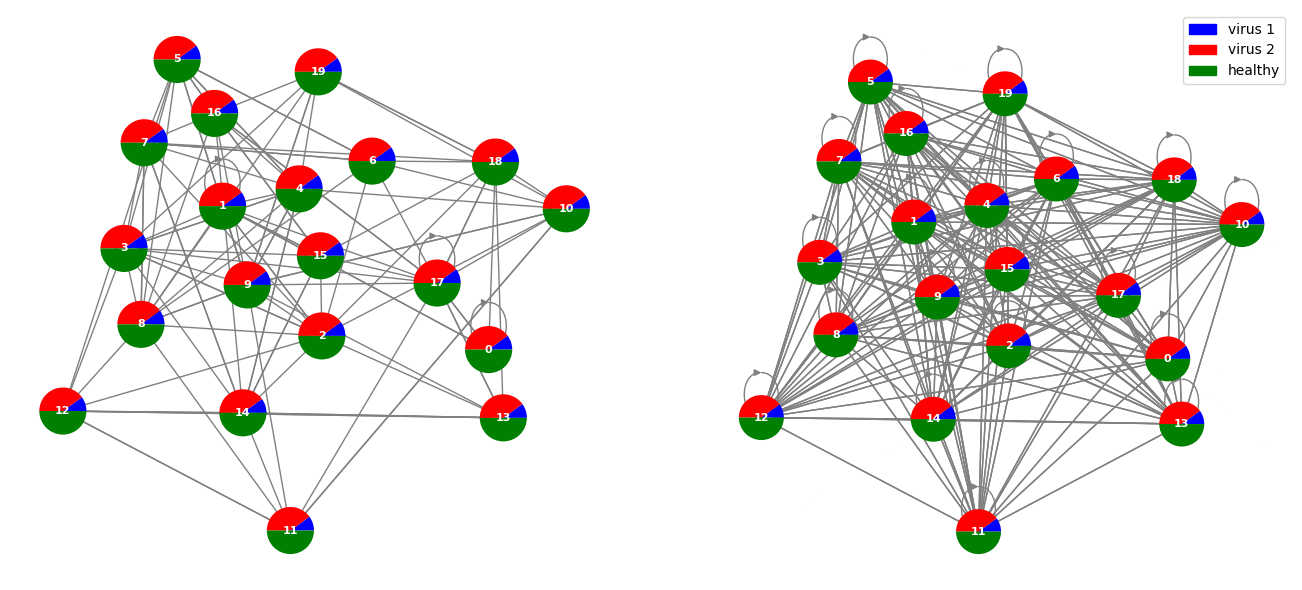

/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:34: RuntimeWarning: divide by zero encountered in matmul
  x1_history.append(x[0].copy())
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:34: RuntimeWarning: overflow encountered in matmul
  x1_history.append(x[0].copy())
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:34: RuntimeWarning: invalid value encountered in matmul
  x1_history.append(x[0].copy())


Main loop Converged at iteration 4984
spectral radius 1 is 1.0011462347620435
spectral radius 2 is 1.0011311193297143
x_bar Converged at iteration 8767
x_bar Converged at iteration 8793
det radius 1 is 1.9989999999999997
det radius 2 is 1.9998879014947406
This experiment satisfies Theorem:  4.4


/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:407: RuntimeWarning: divide by zero encountered in matmul
  
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:407: RuntimeWarning: overflow encountered in matmul
  
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:407: RuntimeWarning: invalid value encountered in matmul
  
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:408: RuntimeWarning: divide by zero encountered in matmul
  if det_radius_1 <= 1 and det_radius_2 <= 1:
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:408: RuntimeWarning: overflow encountered in matmul
  if det_radius_1 <= 1 and det_radius_2 <= 1:
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:408: RuntimeWarning: invalid value encountered in matmul
  if det_radius_1 <

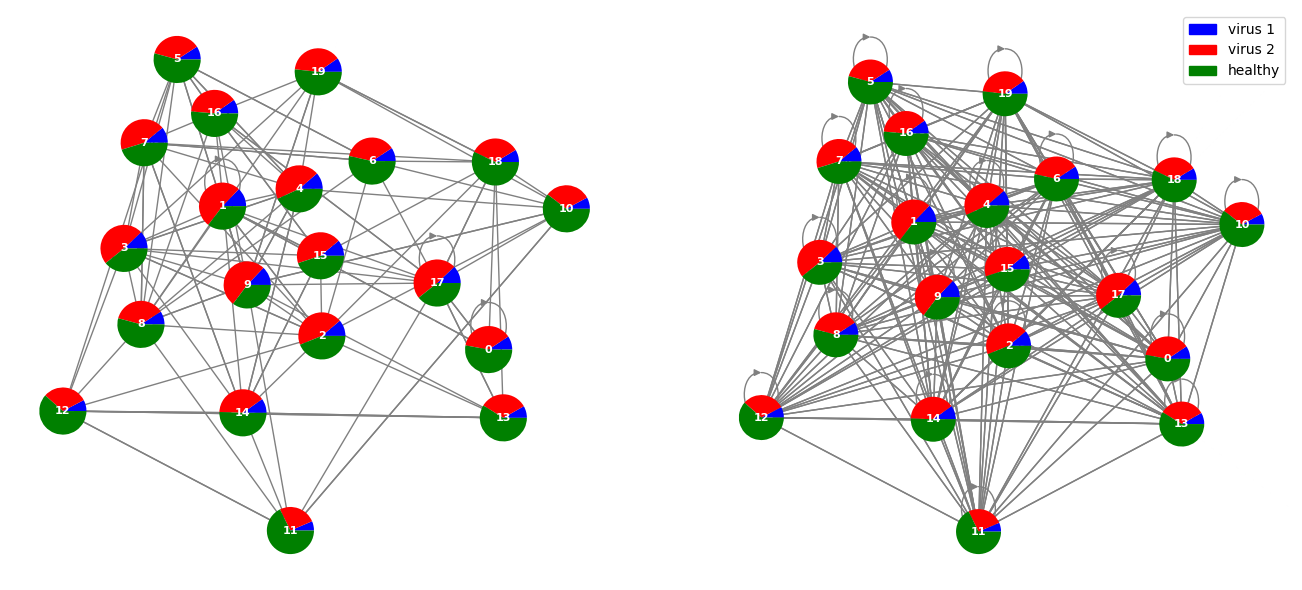

All assumptions satisfied
Main loop Converged at iteration 4523


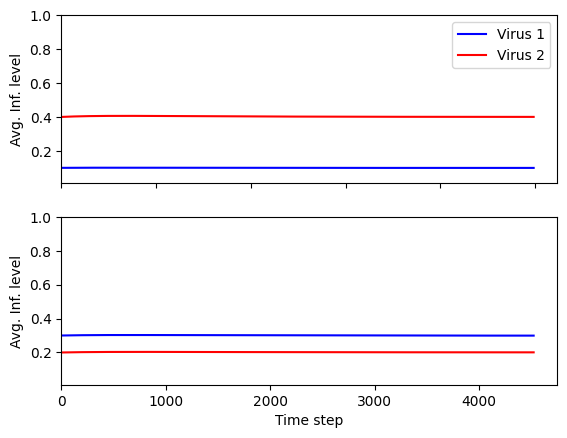

In [18]:
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

import networkx as nx
B1 = nx.from_numpy_array(B[0], create_using=nx.DiGraph) 
B2 = nx.from_numpy_array(B[1], create_using=nx.DiGraph)
default_pos = nx.spring_layout(B1)

x1 = 0.1 * np.ones(config.N)
x2 = 0.4 * np.ones(config.N)
bivirus.check_basic_assumptions(x1, x2, B, delta, config)
bivirus.plot_two_networks_piechart_nodes(B1, B2, x1, x2, pos1=default_pos, pos2=default_pos)

results = bivirus.run_simulation(x1, x2, B, delta, config)
print("This experiment satisfies Theorem: ", bivirus.check_theorem_4(B, delta, config))
x1_histories.append(results["x1_history"])
x2_histories.append(results["x2_history"])
x1_avg_histories.append(results["x1_avg_history"])
x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_two_networks_piechart_nodes(B1, B2, results["x1_history"][-1], results["x2_history"][-1], pos1=default_pos, pos2=default_pos)

x1 = 0.3 * np.ones(config.N)
x2 = 0.2 * np.ones(config.N)
bivirus.check_basic_assumptions(x1, x2, B, delta, config)
results = bivirus.run_simulation(x1, x2, B, delta, config)
x1_histories.append(results["x1_history"])
x2_histories.append(results["x2_history"])
x1_avg_histories.append(results["x1_avg_history"])
x2_avg_histories.append(results["x2_avg_history"])

bivirus.plot_simulation_1by2(x1_avg_histories, x2_avg_histories, yscale='linear')


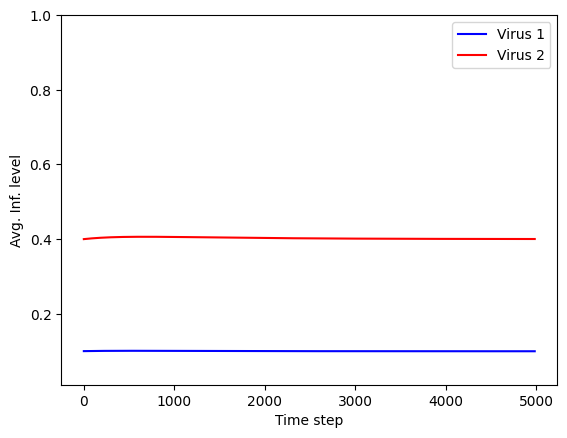

In [19]:
bivirus.plot_simulation_single(x1_avg_histories[0], x2_avg_histories[0], yscale='linear')